In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lateral_control_state_based.lateral_control_state_based as cl
import utils.generate_reference_curve as ref
from utils.plot_vehicle import plot_vehicle as pv
from utils.vizard import vizard as vz

%matplotlib notebook

In [2]:
def main():
    print("Running simulation...")
    radius = 20
    vars_0 = [0.1, -radius, 0.0]
    curve = ref.generate_reference_curve(
        [0, radius, 0, -radius, 0], [-radius, 0, radius, 0, radius], 1.0
    )
    ti = np.arange(0, 100, 0.1)
    model = cl.LateralControlStateBased(vars_0, curve)
    sol = model.simulate(ti, v=1)
    x = sol[:, 0]
    y = sol[:, 1]
    psi = sol[:, 2]
    delta = sol[:, 4]

    fig, ax = plt.subplots()

    plt.plot(curve["x"], curve["y"], "r-", linewidth=0.5)
    plt.plot(x, y, "b-", linewidth=0.5)
    plt.axis("equal")

    (point1,) = ax.plot([], [], marker="o", color="blue", ms=5)

    def update(i, *fargs):
        [l.remove() for l in reversed(ax.lines[1:])]
        ax.plot(x[:i], y[:i], "b-", linewidth=0.5)
        point1.set_data(x[i], y[i])
        pv.plot_vehicle(ax, x[i], y[i], psi[i], delta[i])
        for farg in fargs:
            print(farg)

    viz = vz.Vizard(fig, update, ti)
    plt.show()

Running simulation...


<IPython.core.display.Javascript object>


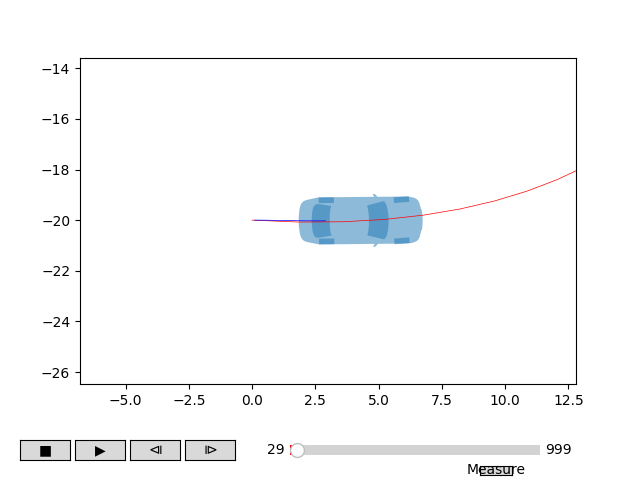

In [3]:
main()